In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
!pwd


/Users/shosei/workspace/kaggle/competitions/league_of_legends_winning_prediction/notebooks


In [4]:
train_df = pd.read_csv('../../../datasets/league-of-legends-winning-predicition/train.csv')
test_df = pd.read_csv('../../../datasets/league-of-legends-winning-predicition/test_template.csv')

In [5]:
# カラムをmdファイルに出力
# with open('columns.md', 'w') as f:
#     for col in train_df.columns:
#         f.write(f'- {col}\n')

In [6]:
# 欠損値チェック
train_df.isnull().sum()

id                        0
win                       0
kills                     0
deaths                    0
assists                   0
largestkillingspree       0
largestmultikill          0
longesttimespentliving    0
doublekills               0
triplekills               0
quadrakills               0
pentakills                0
totdmgdealt               0
magicdmgdealt             0
physicaldmgdealt          0
truedmgdealt              0
largestcrit               0
totdmgtochamp             0
magicdmgtochamp           0
physdmgtochamp            0
truedmgtochamp            0
totheal                   0
totunitshealed            0
dmgtoturrets              0
timecc                    0
totdmgtaken               0
magicdmgtaken             0
physdmgtaken              0
truedmgtaken              0
wardsplaced               0
wardskilled               0
firstblood                0
dtype: int64

In [7]:
# size
train_df.shape, test_df.shape

((144000, 32), (36000, 32))

In [8]:
train_df.head()

,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,0,0,1,5,2,0,1,569,0,0,...,2,0,0,7819,2178,5239,401,4,1,0
1,1,0,5,8,7,3,1,880,0,0,...,4,303,0,24637,5607,17635,1394,10,0,0
2,2,1,1,6,16,0,1,593,0,0,...,3,329,0,18749,3651,14834,263,7,1,0
3,3,0,1,2,0,0,1,381,0,0,...,1,0,0,12134,1739,10318,76,8,1,0
4,4,0,4,11,25,0,1,455,0,0,...,8,0,0,27891,14068,12749,1073,34,2,0


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144000 entries, 0 to 143999
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   id                      144000 non-null  int64
 1   win                     144000 non-null  int64
 2   kills                   144000 non-null  int64
 3   deaths                  144000 non-null  int64
 4   assists                 144000 non-null  int64
 5   largestkillingspree     144000 non-null  int64
 6   largestmultikill        144000 non-null  int64
 7   longesttimespentliving  144000 non-null  int64
 8   doublekills             144000 non-null  int64
 9   triplekills             144000 non-null  int64
 10  quadrakills             144000 non-null  int64
 11  pentakills              144000 non-null  int64
 12  totdmgdealt             144000 non-null  int64
 13  magicdmgdealt           144000 non-null  int64
 14  physicaldmgdealt        144000 non-null  int64
 15  

In [10]:
# 基本情報
train_df.describe().drop(['id', 'win'], axis=1)



,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
count,144000.000000,144000.000000,144000.000000,144000.000000,144000.000000,144000.000000,144000.000000,144000.000000,144000.000000,144000.000000,...,144000.000000,144000.000000,144000.0,144000.000000,144000.000000,144000.000000,144000.000000,144000.000000,144000.000000,144000.000000
mean,5.795319,5.815014,8.326840,2.670000,1.332097,630.111882,0.539875,0.073049,0.010222,0.001736,...,2.250215,2138.476069,0.0,23227.671236,8140.301257,14034.000208,1052.613951,11.500806,1.781111,0.099535
std,4.601068,3.264384,5.940479,2.534691,0.757678,310.996662,0.923632,0.295953,0.105045,0.042782,...,2.463150,2938.141327,0.0,11853.628491,5153.802548,7740.956581,1267.372246,7.538313,2.222489,0.299380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,4.000000,0.000000,1.000000,432.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,15285.000000,4531.000000,8630.000000,274.000000,7.000000,0.000000,0.000000
50%,5.000000,6.000000,7.000000,2.000000,1.000000,590.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,984.000000,0.0,21521.000000,7250.000000,12796.500000,657.000000,10.000000,1.000000,0.000000
75%,8.000000,8.000000,12.000000,4.000000,2.000000,791.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,3213.000000,0.0,29471.000000,10743.000000,18199.000000,1355.000000,14.000000,3.000000,0.000000
max,39.000000,23.000000,52.000000,31.000000,5.000000,3038.000000,11.000000,7.000000,4.000000,2.000000,...,90.000000,51782.000000,0.0,118130.000000,55323.000000,73172.000000,20450.000000,322.000000,48.000000,1.000000


In [11]:
# kills=39のレコードを確認
train_df[train_df['kills'] == 39]

,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
79343,79343,1,39,7,6,19,5,558,9,4,...,3,17461,0,41178,17806,21790,1581,18,0,0


In [12]:
# KDAを計算する関数, 
def calculate_kda(row):
    kills = row['kills']
    deaths = row['deaths']
    assists = row['assists']
    # 分子と分母が0になるのを防ぐ
    kda = (kills + assists + 1) / (deaths + 1)  # avoid division by zero
    return kda

In [13]:
# KDAのカラムを追加
train_df['KDA'] = train_df.apply(calculate_kda, axis=1)
test_df['KDA'] = test_df.apply(calculate_kda, axis=1)


In [14]:
train_df.head()

,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood,KDA
0,0,0,1,5,2,0,1,569,0,0,...,0,0,7819,2178,5239,401,4,1,0,0.666667
1,1,0,5,8,7,3,1,880,0,0,...,303,0,24637,5607,17635,1394,10,0,0,1.444444
2,2,1,1,6,16,0,1,593,0,0,...,329,0,18749,3651,14834,263,7,1,0,2.571429
3,3,0,1,2,0,0,1,381,0,0,...,0,0,12134,1739,10318,76,8,1,0,0.666667
4,4,0,4,11,25,0,1,455,0,0,...,0,0,27891,14068,12749,1073,34,2,0,2.500000


### 重要そうな要素単体での勝率への寄与率を調べてみる

In [15]:
train_df[['KDA', 'win']].groupby('win').describe().T

win                   0             1
KDA count  72041.000000  71959.000000
    mean       1.598396      4.124069
    std        1.010767      3.071046
    min        0.055556      0.076923
    25%        1.000000      2.300000
    50%        1.400000      3.333333
    75%        2.000000      5.000000
    max       31.000000     43.000000

In [16]:
# pentakills>0のレコードについて、winの割合を確認
train_df[train_df['pentakills'] > 0]['win'].value_counts(normalize=True)

1    0.884774
0    0.115226
Name: win, dtype: float64

In [17]:
# firstBloodKillの値ごとにwinの割合を確認
train_df[train_df['firstblood'] == 1]['win'].value_counts(normalize=True)

1    0.595688
0    0.404312
Name: win, dtype: float64

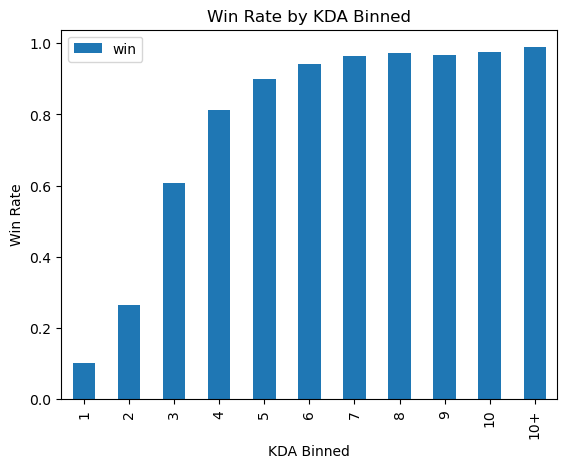

In [18]:
# KDAについて調べる. kda={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10以上}のレコードについて、winの割合を確認
train_df['KDA_binned'] = pd.cut(train_df['KDA'], 
                                bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.inf], 
                                labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, '10+'])
train_df[['KDA_binned', 'win']].groupby('KDA_binned').mean().plot(kind='bar')
plt.title('Win Rate by KDA Binned')
plt.xlabel('KDA Binned')
plt.ylabel('Win Rate')
plt.show()

In [19]:
# kdabinedを削除
train_df.drop('KDA_binned', axis=1, inplace=True)

In [20]:
# 勝敗の件数
win_counts = train_df['win'].value_counts()
print(f"\n勝利: {win_counts[1]} ({win_counts[1]/len(train_df)*100:.2f}%)")
print(f"敗北: {win_counts[0]} ({win_counts[0]/len(train_df)*100:.2f}%)")


勝利: 71959 (49.97%)
敗北: 72041 (50.03%)


In [21]:
win_counts

0    72041
1    71959
Name: win, dtype: int64

In [22]:

# クラスバランスの判定
balance_ratio = min(win_counts) / max(win_counts)
print(f"クラスバランス比: {balance_ratio:.2f}")

クラスバランス比: 1.00


### 各特徴量の分布を確認

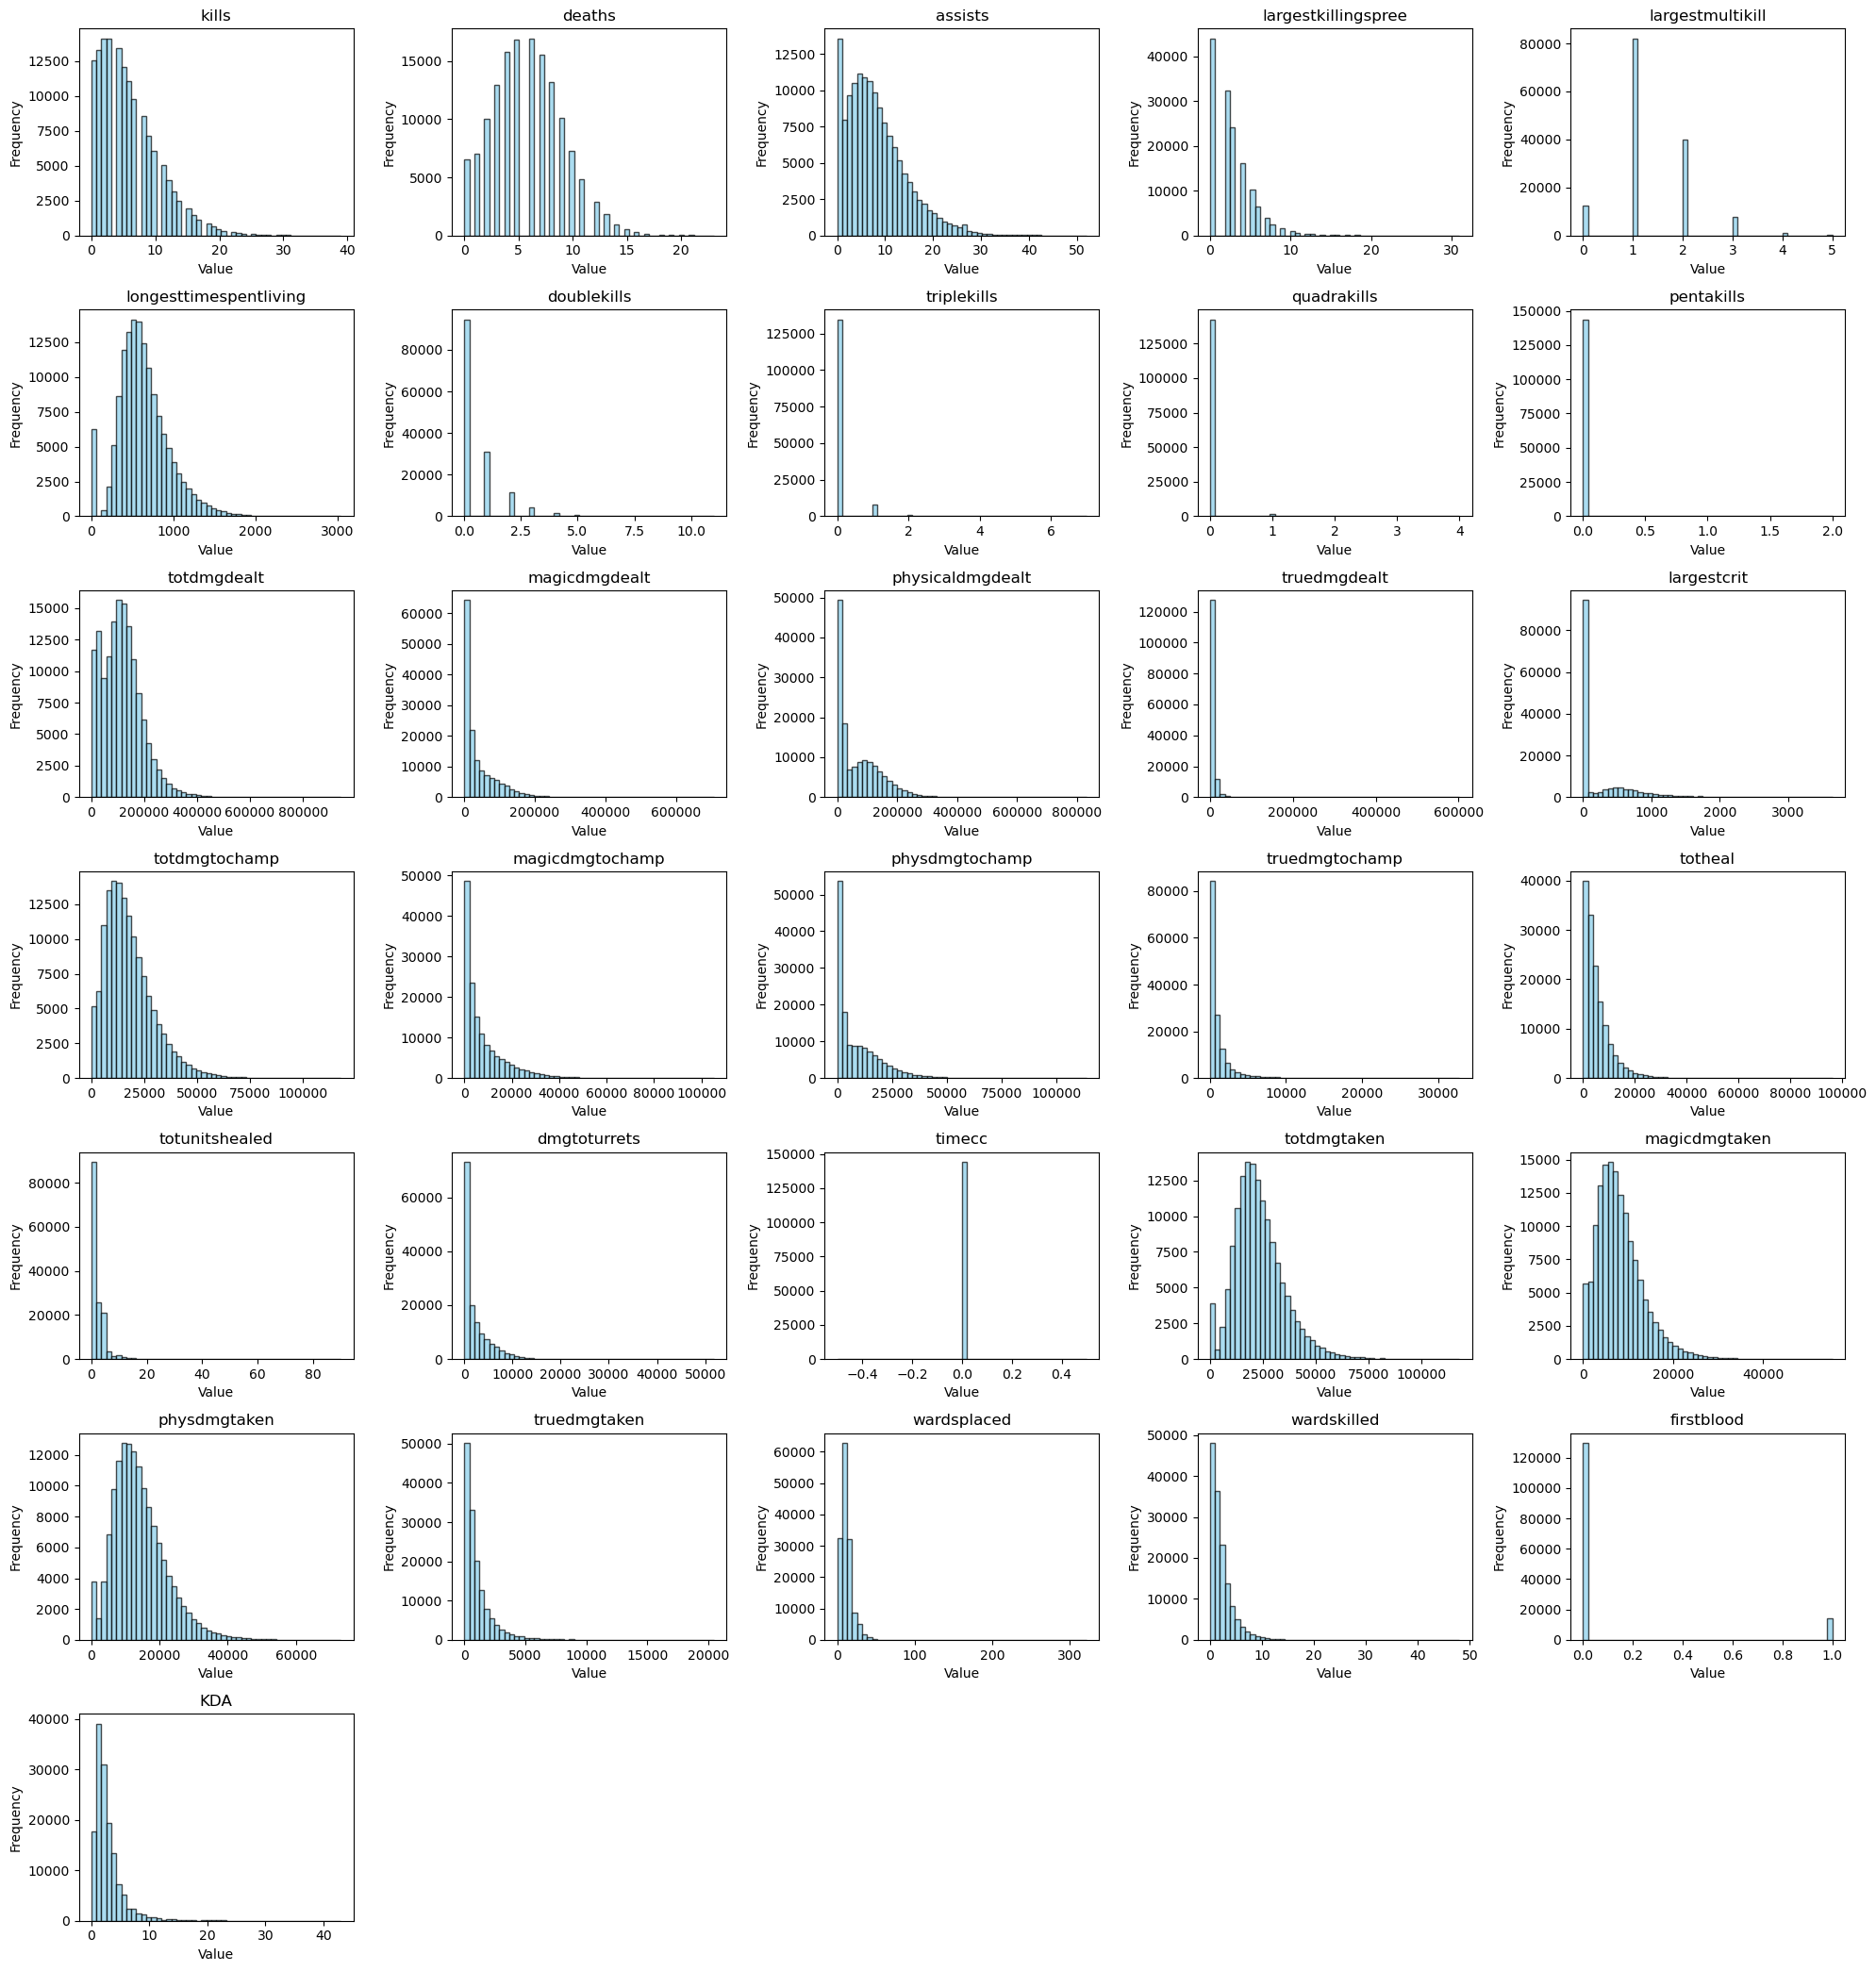

In [23]:
# id, win列をのぞくカラム
feature_columns = [col for col in train_df.columns if col not in ['id', 'win']]

# 数値特徴量の分布をヒストグラムで確認
n_cols = 5
n_rows = (len(feature_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(feature_columns):
    axes[idx].hist(train_df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(col)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# 余ったサブプロットを削除
for idx in range(len(feature_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()



In [24]:
# 情報量がないカラムについて調べる
nunique = train_df.nunique()
constant_columns = nunique[nunique == 1].index.tolist()
print(f"情報量がないカラム: {constant_columns}")

情報量がないカラム: ['timecc']


In [25]:
train_df.drop(columns=constant_columns, inplace=True)

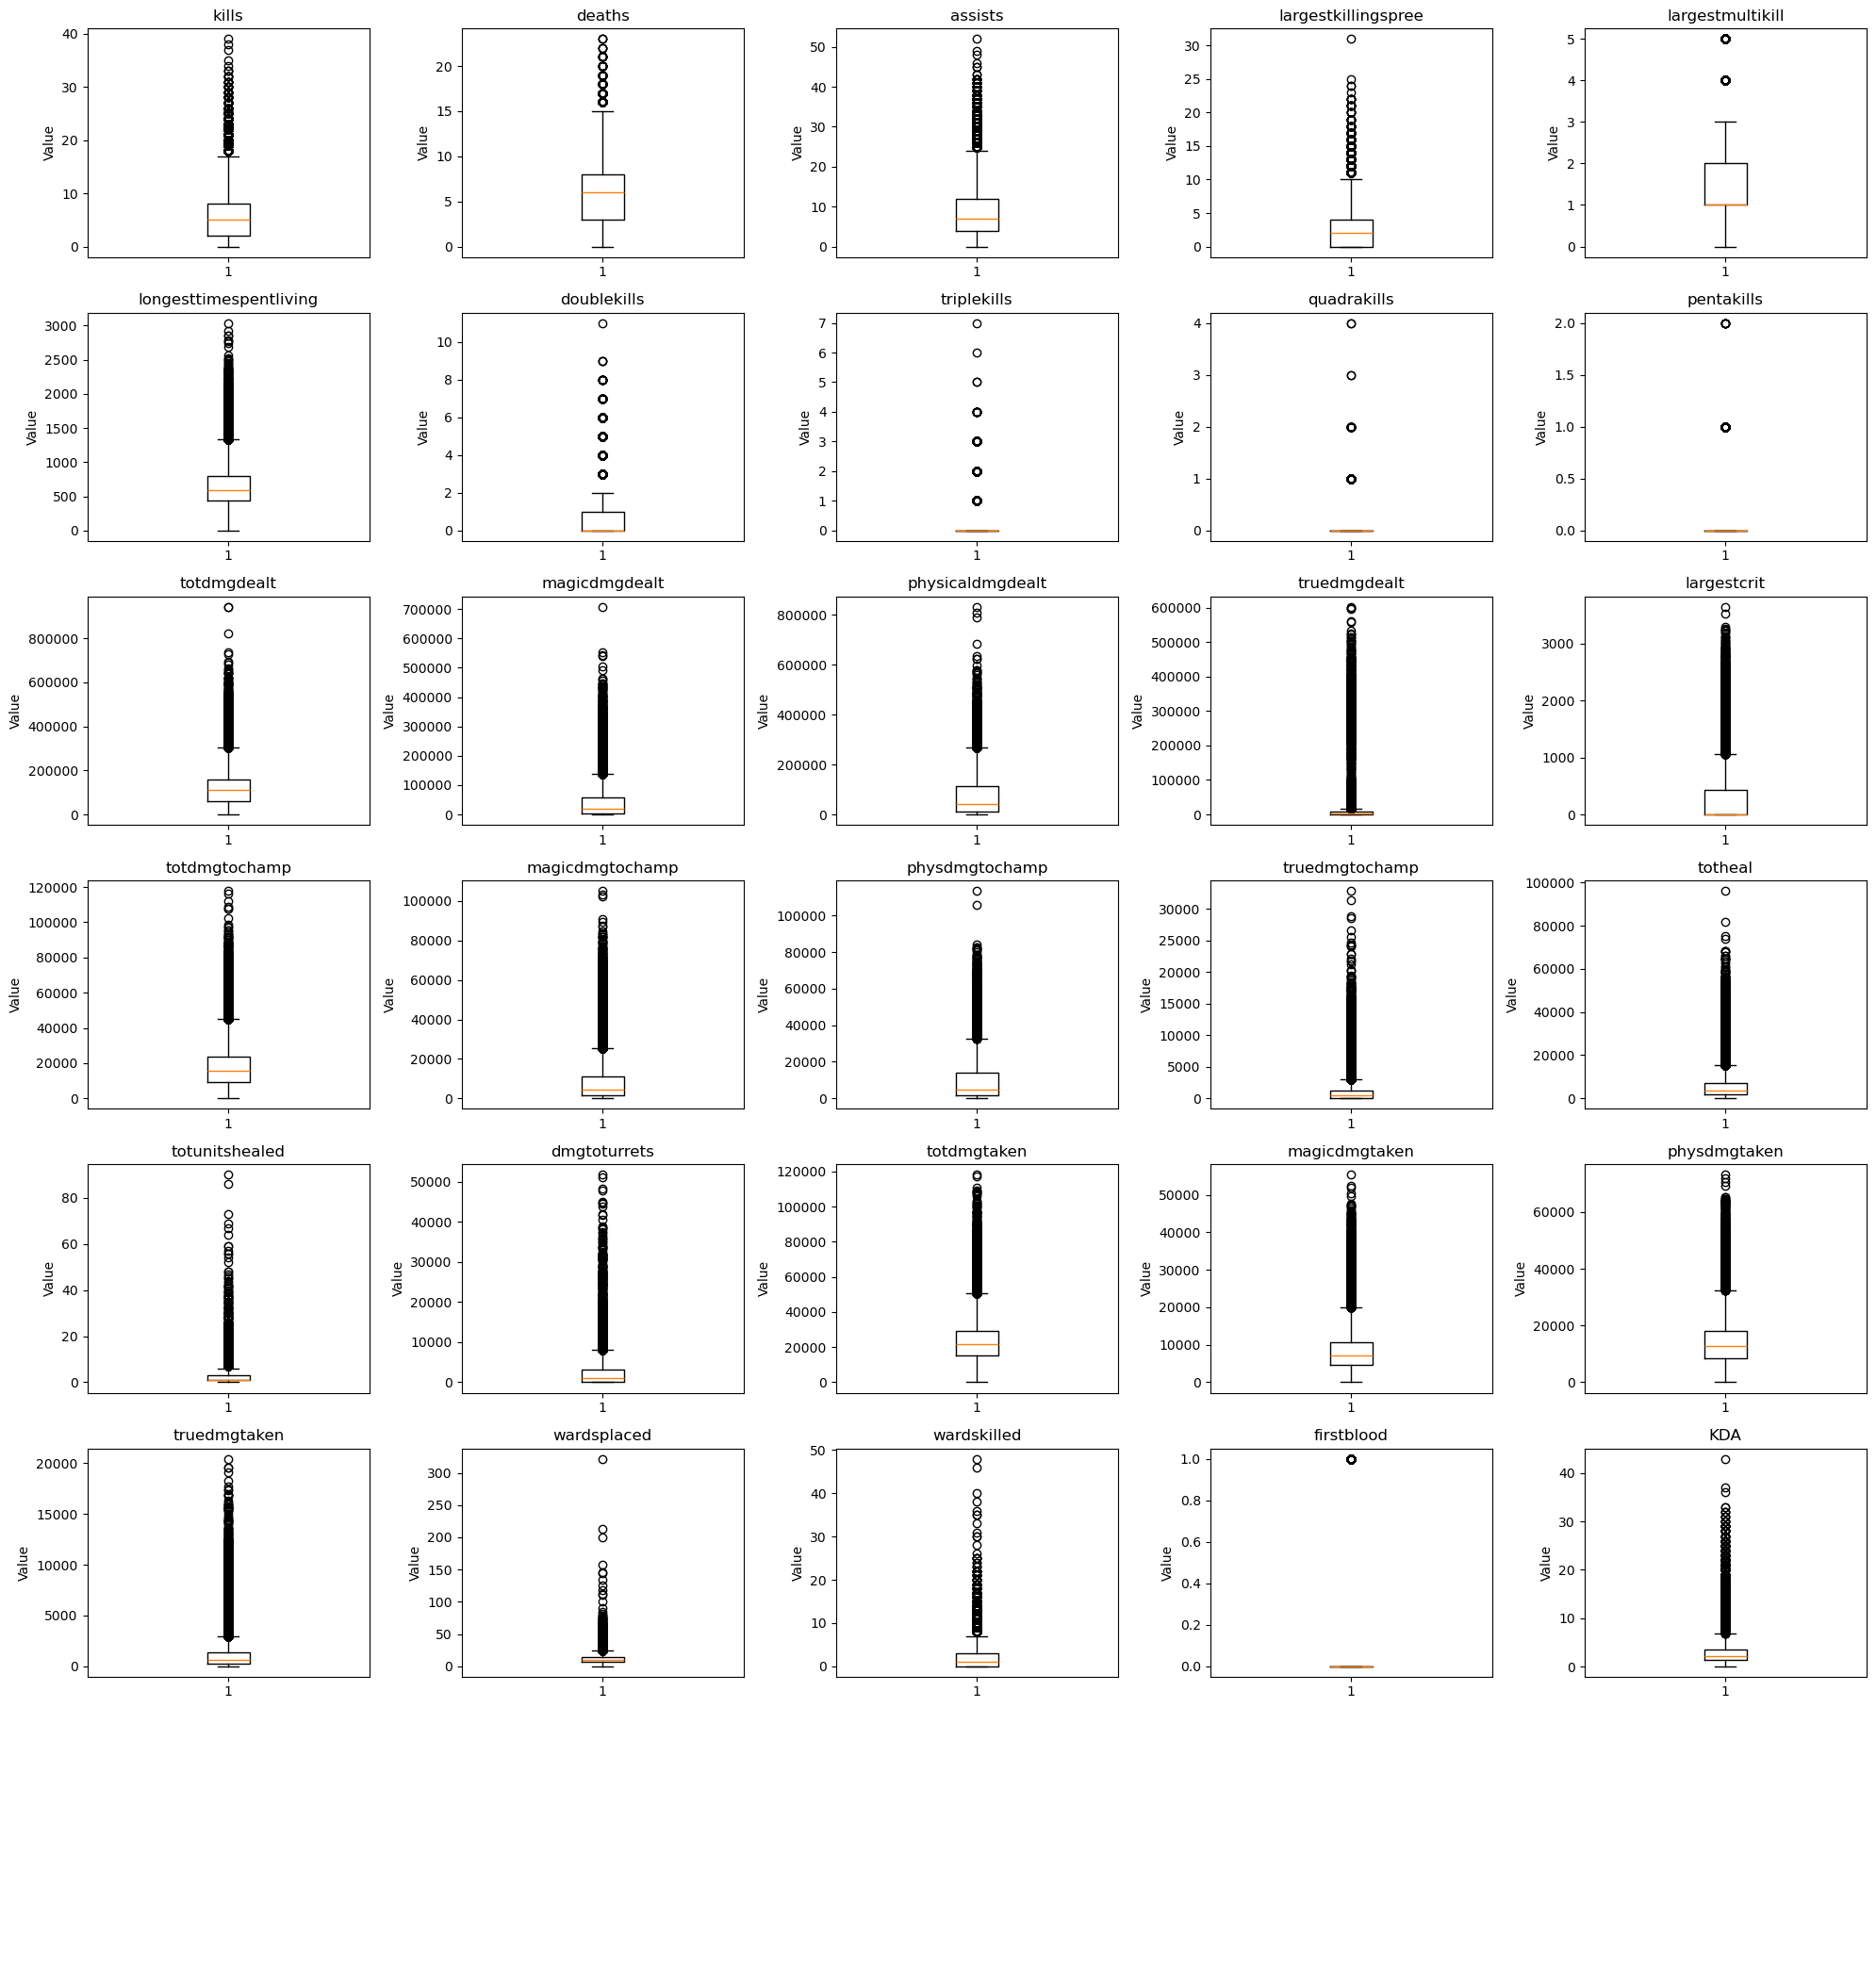

In [26]:
# 箱ひげ図で外れ値を確認
# feature_columnsからtimeccを削除
feature_columns = [col for col in feature_columns if col != 'timecc']


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows *3))
axes = axes.flatten()

for idx, col in enumerate(feature_columns):
    axes[idx].boxplot(train_df[col].dropna(), vert=True)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Value')

# 余分なサブプロットを削除
for idx in range(len(feature_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()




memo: 右裾の長いデータを使っているから箱ひげ図は機能しないみたい
対数変換して再チャレンジ

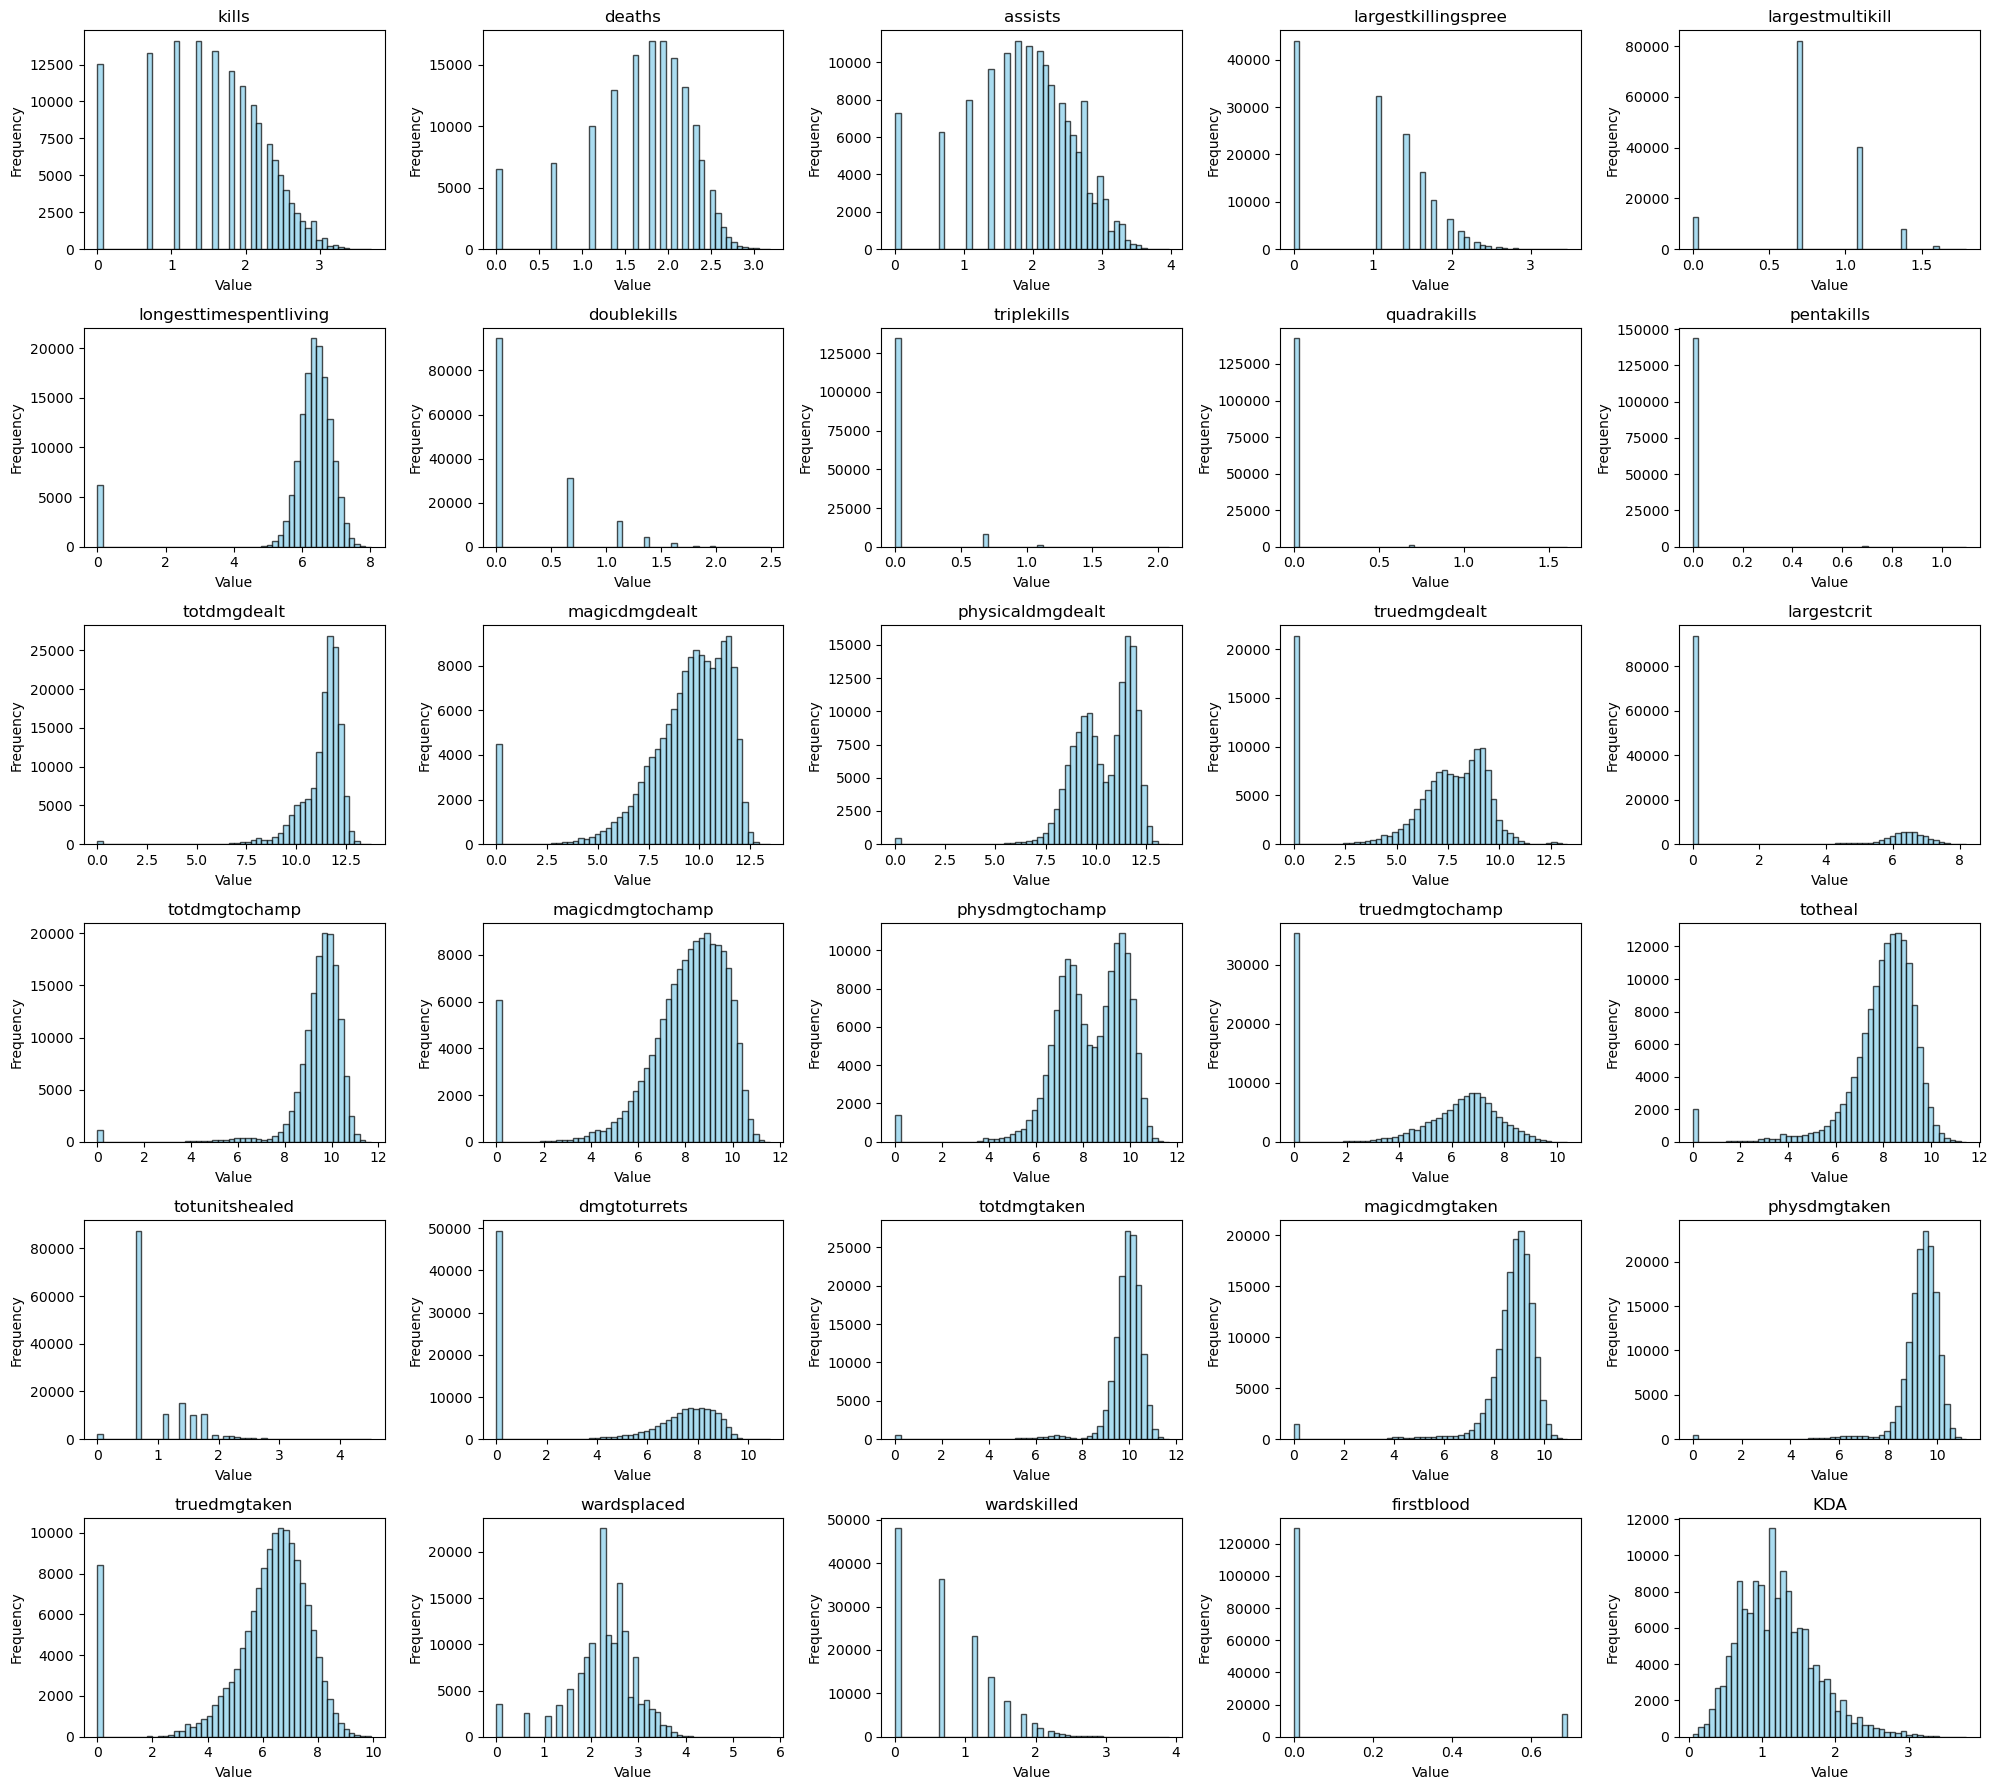

In [27]:
# 全てのカラムを対数変換してみる
# 新しいデータフレームを作成
train_df_log = train_df.copy()
test_df_log = test_df.copy()
for col in feature_columns:
    # 元の値が0以下の場合、対数変換できないので1を足す
    train_df_log[col] = np.log1p(train_df_log[col])
    test_df_log[col] = np.log1p(test_df_log[col])

# 数値特徴量の分布をヒストグラムで確認
n_cols = 5
n_rows = (len(feature_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()
for idx, col in enumerate(feature_columns):
    axes[idx].hist(train_df_log[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(col)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
# 余ったサブプロットを削除
for idx in range(len(feature_columns), len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.show()


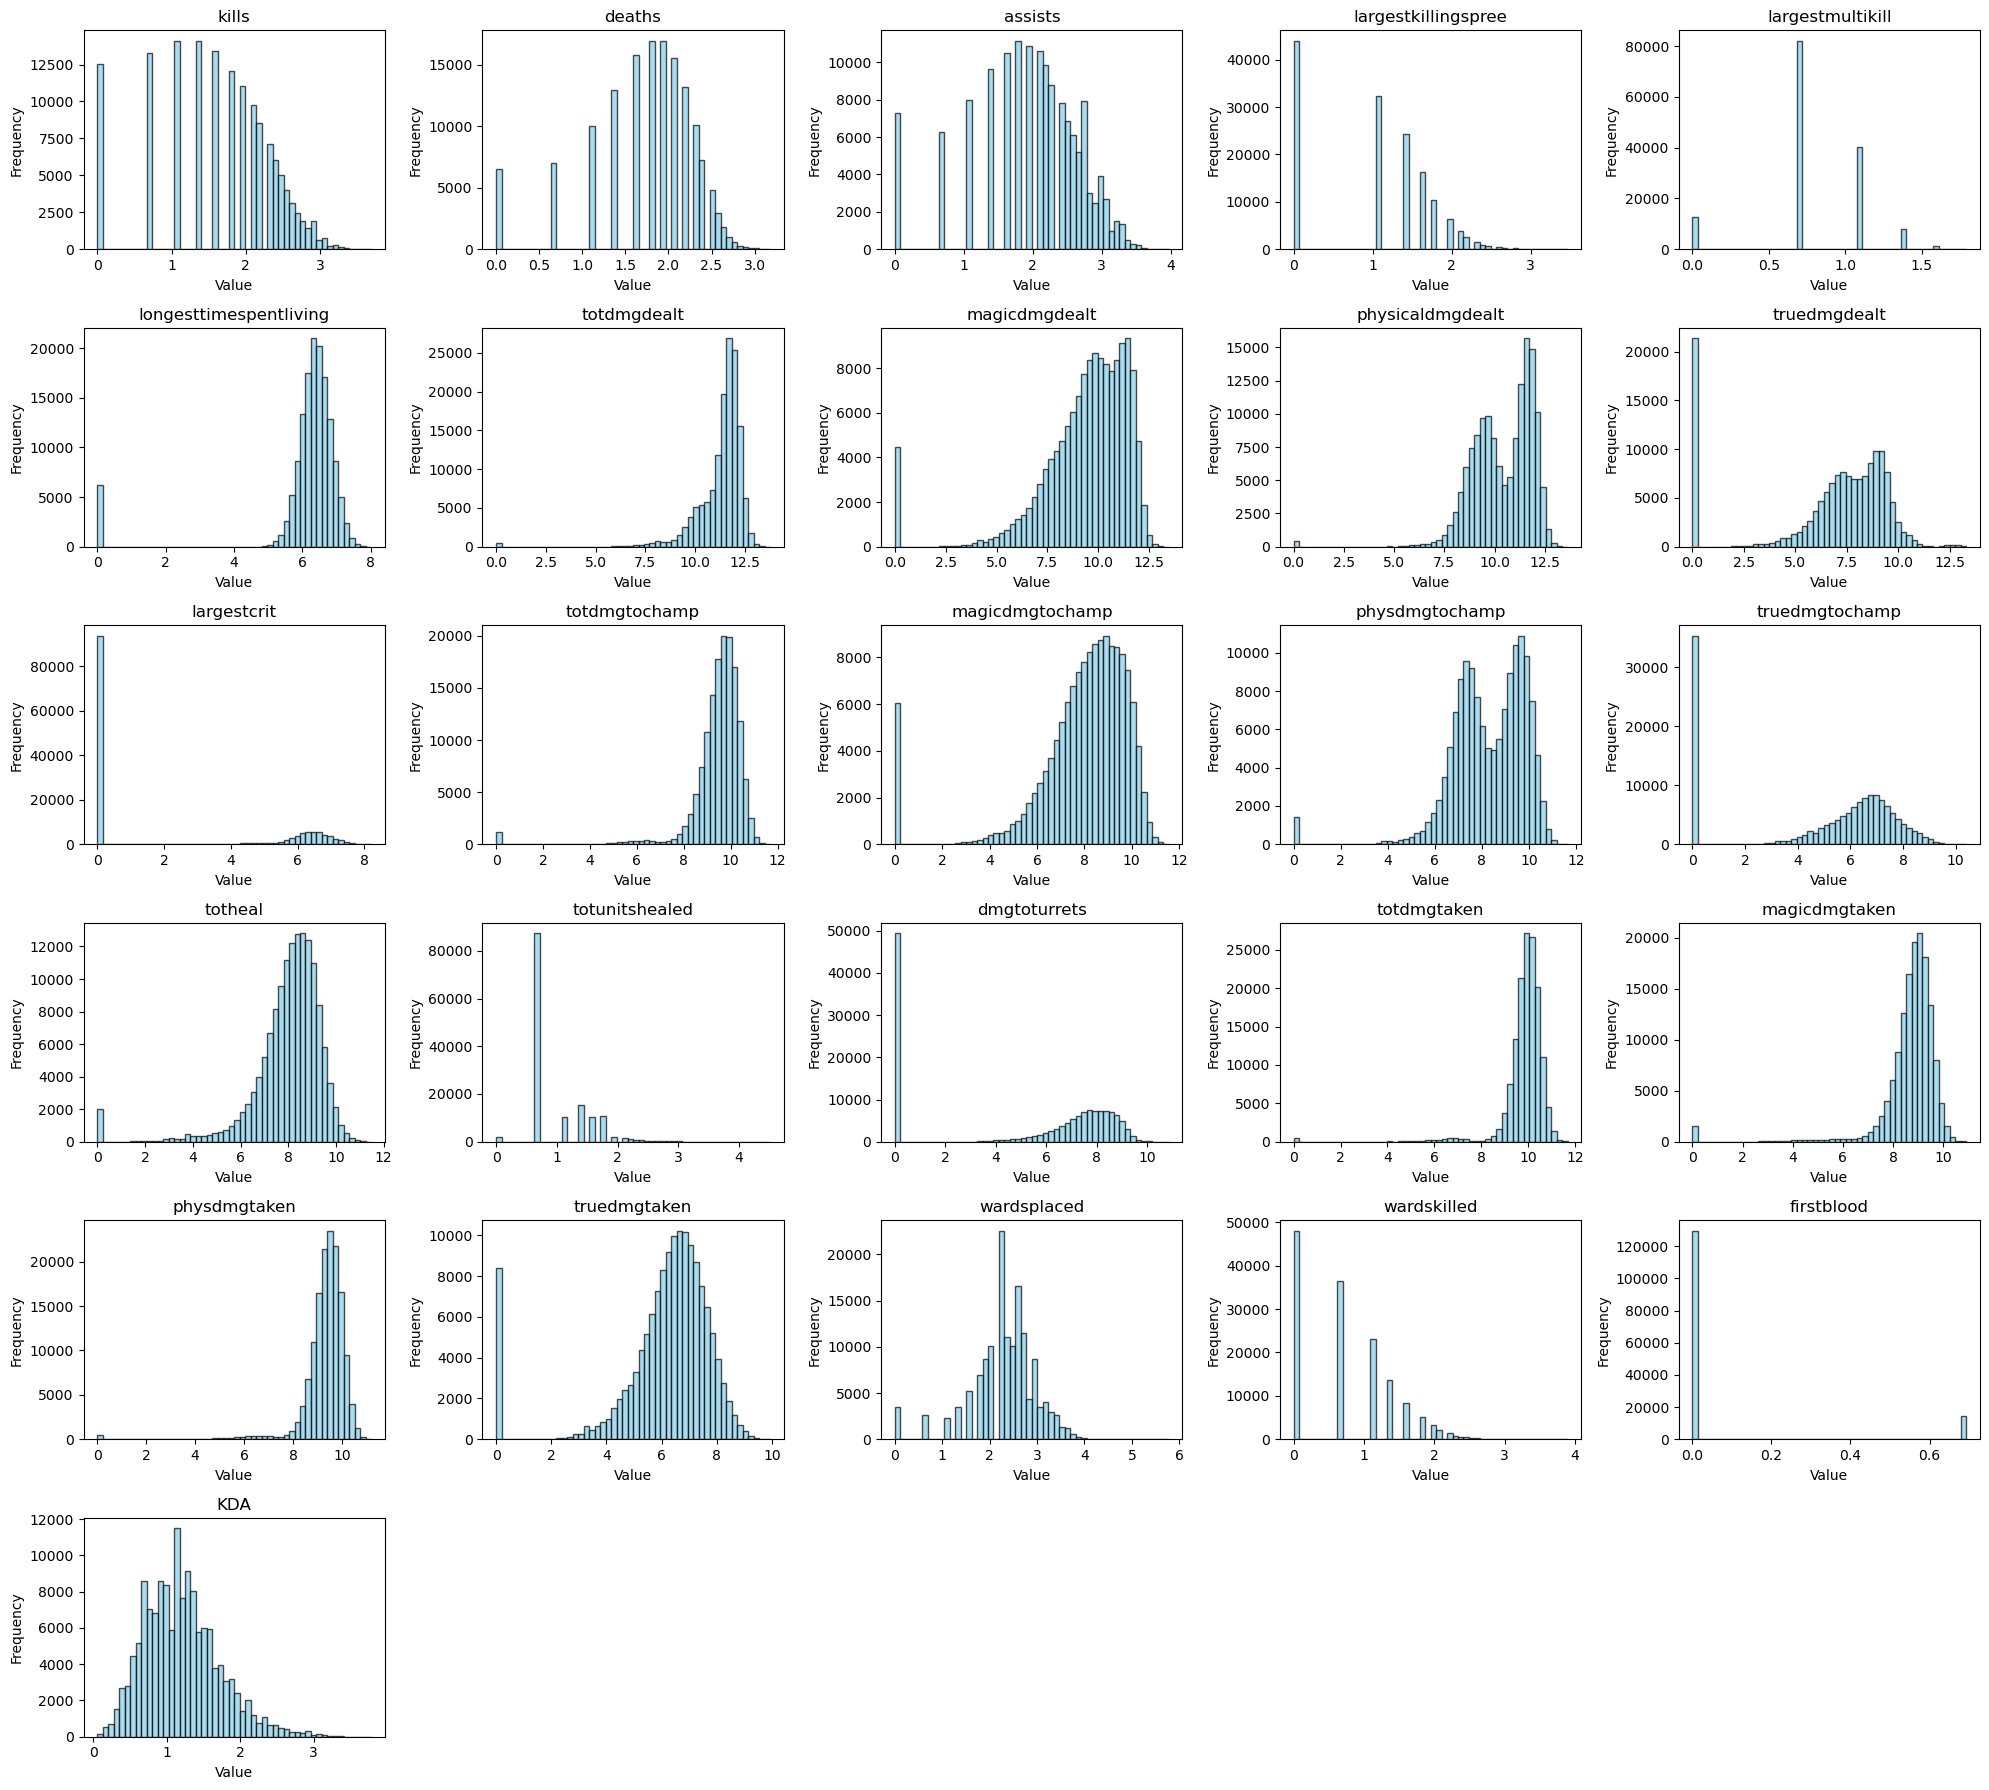

In [28]:
# box-cox変換をしてみる
from scipy import stats
# 新しいデータフレームを作成
train_df_bc= train_df.copy()
test_df_bc= test_df.copy()
# box-coxしないカラムのリスト
keep_columns = ['doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firlstblood']

feature_columns = [col for col in feature_columns if col not in keep_columns]
for col in feature_columns:
    # 元の値が0以下の場合、対数変換できないので1を足す
    train_df_bc[col] = stats.boxcox(train_df_log[col] + 1)[0]
    test_df_bc[col] = stats.boxcox(test_df_log[col] + 1)[0]

# 数値特徴量の分布をヒストグラムで確認
n_cols = 5
n_rows = (len(feature_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()
for idx, col in enumerate(feature_columns):
    axes[idx].hist(train_df_log[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(col)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
# 余ったサブプロットを削除
for idx in range(len(feature_columns), len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

### 相関分析

勝敗と最も相関が高い特徴量 TOP 10:
win                    1.000000
KDA                    0.483608
dmgtoturrets           0.384984
largestkillingspree    0.317180
assists                0.304382
kills                  0.263815
largestmultikill       0.209790
doublekills            0.205472
totdmgtochamp          0.146040
totdmgdealt            0.134647
dtype: float64
勝敗と最も相関が低い特徴量 TOP 10:
truedmgdealt     0.040873
wardskilled      0.033596
pentakills       0.031513
wardsplaced      0.028539
id              -0.003736
truedmgtaken    -0.039506
physdmgtaken    -0.046507
totdmgtaken     -0.074532
magicdmgtaken   -0.091852
deaths          -0.365685
dtype: float64


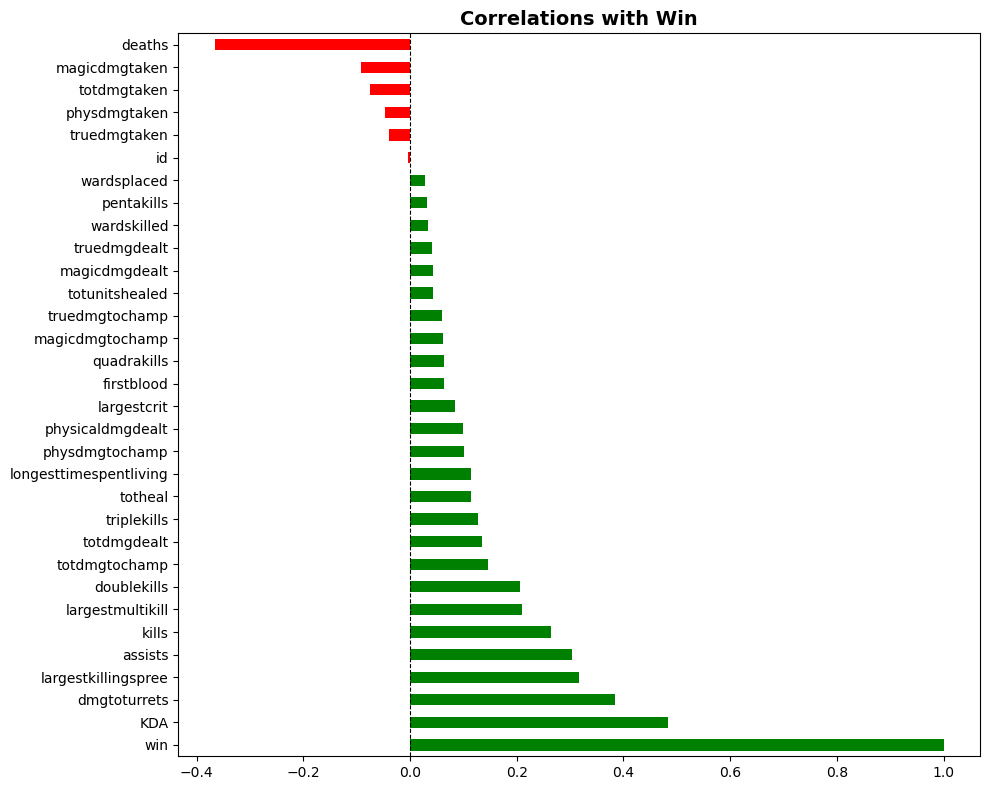

In [29]:
correlations = train_df.corrwith(train_df['win']).sort_values(ascending=False)

print("勝敗と最も相関が高い特徴量 TOP 10:")
print(correlations.head(10))

print("勝敗と最も相関が低い特徴量 TOP 10:")
print(correlations.tail(10))

# 可視化
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color=correlations.apply(lambda x: 'green' if x > 0 else 'red'))
plt.title('Correlations with Win', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

memo: 

これめちゃくちゃいい。何が勝敗に強く影響を与えているかが一目でわかる。
ただ、ペンタキルの相関係数がそこまで高くない。ペンタ取ったら9割勝利するので直感に反する。
どうやら発生頻度が低すぎると相関係数が小さくなるらしい。
あと自作のKDAの相関が高いのは嬉しい。

相関係数の数式：
$$

\begin{align*}
r &= \frac{Cov(X, Y)}{\sigma_X, \sigma_Y} \\
  &= \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}} \\
\end{align*}
$$



pentakillsは分散が小さいから相関係数は大きくなりそうだけど、それ以上に分子の教分散が小さくなるのかな、、？

なんか分散が小さいと共分散も小さくなるっぽい

### 勝敗別の特徴量分布比較

In [30]:
# 重要な特徴量TOP5について、勝敗別の分布を比較
top_features = correlations.abs().sort_values(ascending=False).head(6).index.tolist()
top_features.remove('win')  # 'win'を除外
top_features

['KDA', 'dmgtoturrets', 'deaths', 'largestkillingspree', 'assists']

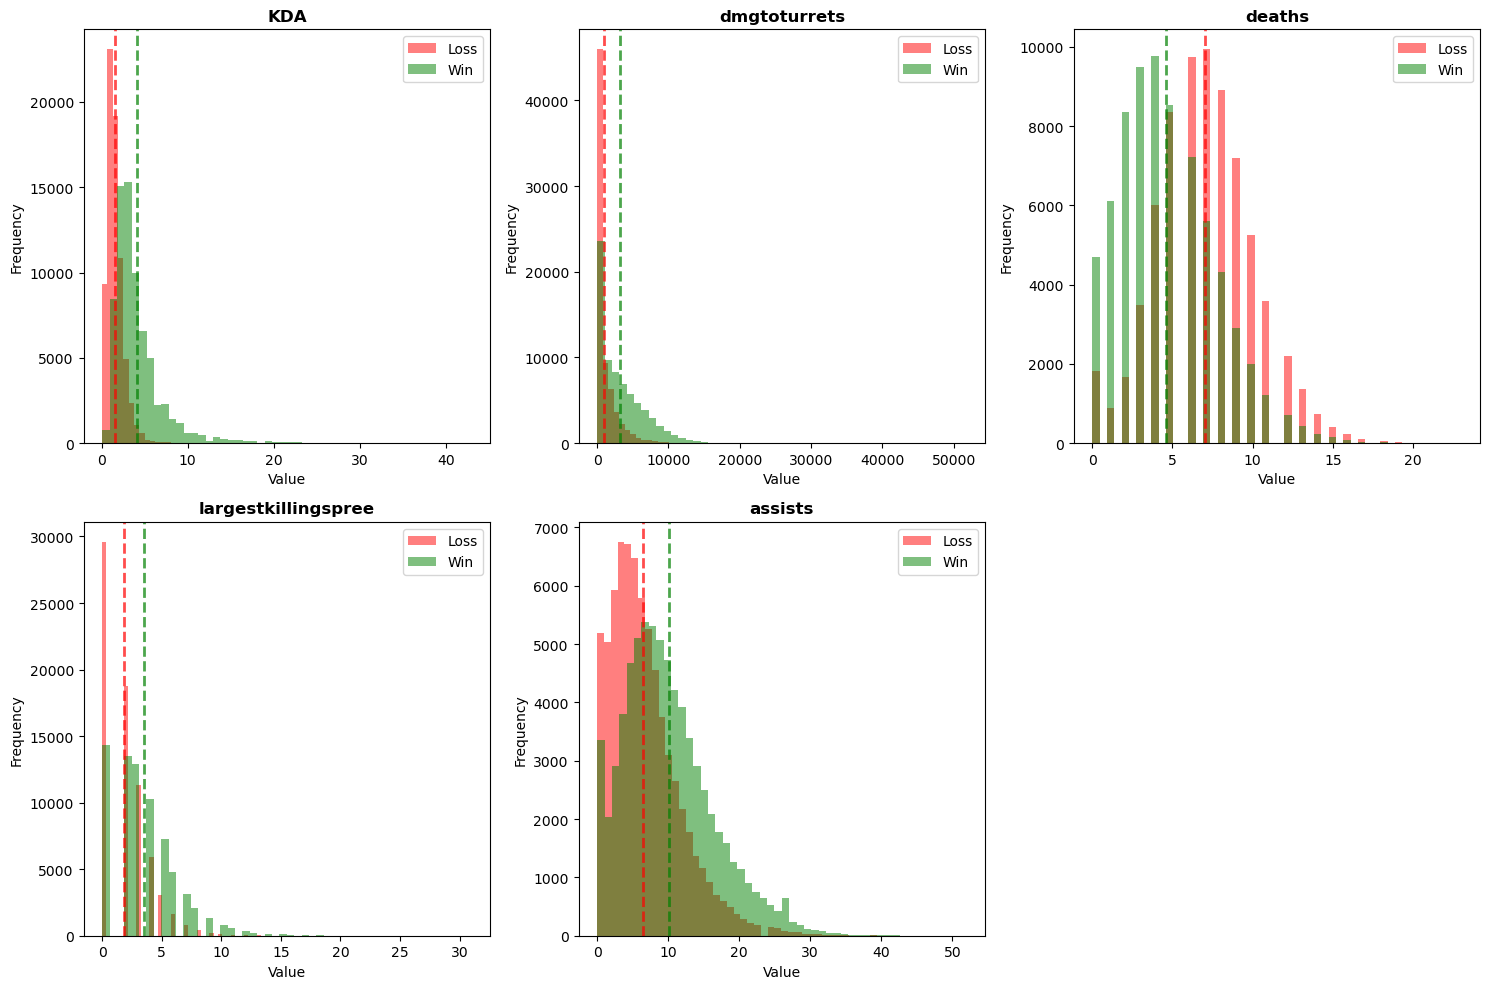

In [31]:
# 重要な特徴量TOP5について、勝敗別の分布を比較（ヒストグラム）
n_features = len(top_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()  # 1次元配列に変換

for idx, col in enumerate(top_features):
    # 勝利と敗北でデータを分ける
    win_data = train_df[train_df['win'] == 1][col]
    loss_data = train_df[train_df['win'] == 0][col]
    
    axes[idx].hist(loss_data, bins=50, alpha=0.5, label='Loss', color='red')
    axes[idx].hist(win_data, bins=50, alpha=0.5, label='Win', color='green')
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

    # 平均値の表示
    axes[idx].axvline(loss_data.mean(), color='red', linestyle='--', linewidth=2, alpha=0.7)
    axes[idx].axvline(win_data.mean(), color='green', linestyle='--', linewidth=2, alpha=0.7)

# 余分なサブプロットを非表示
for idx in range(len(top_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [32]:

# 統計的な比較
for col in top_features:
    win_mean = train_df[train_df['win'] == 1][col].mean()
    loss_mean = train_df[train_df['win'] == 0][col].mean()
    diff = win_mean - loss_mean
    print(f"{col}:")
    print(f"  勝利時平均: {win_mean:.2f}")
    print(f"  敗北時平均: {loss_mean:.2f}")
    print(f"  差: {diff:.2f}\n")

KDA:
  勝利時平均: 4.12
  敗北時平均: 1.60
  差: 2.53

dmgtoturrets:
  勝利時平均: 3270.26
  敗北時平均: 1007.99
  差: 2262.27

deaths:
  勝利時平均: 4.62
  敗北時平均: 7.01
  差: -2.39

largestkillingspree:
  勝利時平均: 3.47
  敗北時平均: 1.87
  差: 1.61

assists:
  勝利時平均: 10.14
  敗北時平均: 6.52
  差: 3.62



### 特徴量の相関

In [33]:
type(train_df.iloc[1,1])

numpy.int64

高い相関を持つ特徴両ペア（｜相関｜> 0.8:
          Feature 1            Feature 2  Correlation
0             kills  largestkillingspree     0.806426
1     magicdmgdealt      magicdmgtochamp     0.881020
2  physicaldmgdealt       physdmgtochamp     0.892305
3       totdmgtaken         physdmgtaken     0.913954


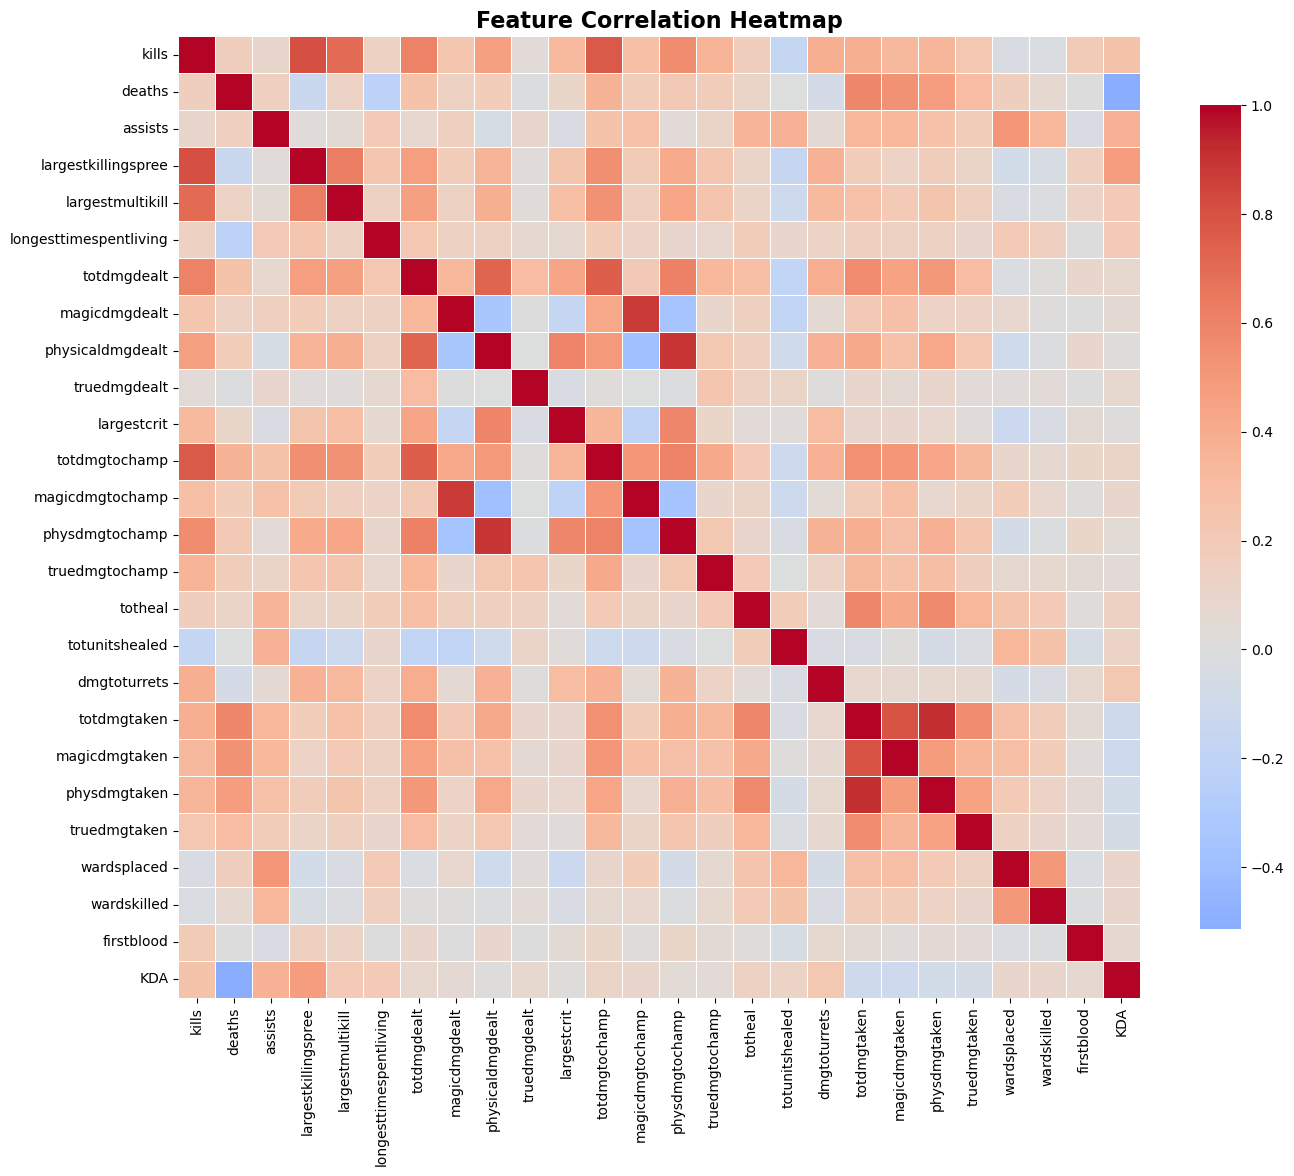

In [ ]:
# snsをインポート
import seaborn as sns

# 相関行列を計算
correlation_matrix = train_df[feature_columns].corr()

# 高い相関を持つペアを見つける
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if np.abs(correlation_matrix.values[i, j]) > 0.8:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })
if high_corr_pairs:
    print("高い相関を持つ特徴両ペア（｜相関｜> 0.8:")
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df)
else:
    print("特に高い相関を持つ特徴両ペアはありません")

# ヒートマップで可視化
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# 相関行列のメモ


In [36]:
correlation_matrix.head()

,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,...,totunitshealed,dmgtoturrets,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood,KDA
kills,1.000000,0.172490,0.084594,0.806426,0.703878,0.137133,0.609886,0.243507,0.463645,0.032270,...,-0.169182,0.389256,0.391120,0.324691,0.345632,0.226645,-0.037192,-0.026964,0.197434,0.266997
deaths,0.172490,1.000000,0.155976,-0.132470,0.125593,-0.222930,0.256403,0.135932,0.179629,-0.011485,...,-0.004523,-0.068097,0.582851,0.536373,0.485594,0.304193,0.172093,0.066425,0.003208,-0.512926
assists,0.084594,0.155976,1.000000,0.025008,0.050150,0.212848,0.082128,0.149574,-0.046232,0.090231,...,0.368590,0.057356,0.343454,0.335242,0.271008,0.193708,0.512037,0.340239,-0.029323,0.368631
largestkillingspree,0.806426,-0.132470,0.025008,1.000000,0.627575,0.241751,0.469796,0.184298,0.358223,0.028600,...,-0.157704,0.370834,0.183334,0.131242,0.175344,0.110014,-0.078719,-0.044215,0.154431,0.481382
largestmultikill,0.703878,0.125593,0.050150,0.627575,1.000000,0.138385,0.465906,0.143327,0.383641,0.025319,...,-0.108780,0.317394,0.267709,0.212687,0.243846,0.149559,-0.036716,-0.021751,0.119981,0.208270
